In [1]:
import sklearn as sk
import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt

In [6]:
## filename of the output file of promort_model_evaluation.py
fn = '../../python/test_evaluation_test_0.77/splits.pckl_promort_checkpoint_80.bin/pred.csv'

In [7]:
df = pd.read_csv(fn)

In [9]:
true = df['tumor_gt']
score = df['tumor_p']

### ROC and AUC

In [10]:
fpr, tpr, th = roc_curve(true, score)
auc = roc_auc_score(true, score)

### Best accuracy threshold

In [11]:
a_s_l = []
for t in th[1:]:
    pred = np.array(score.values)
    pred[pred >= t] = 1
    pred[pred < t] = 0
    a_s = accuracy_score(true, pred)
    a_s_l.append(a_s)

m_val = max(a_s_l)
th_m_val = th[np.argmax(a_s_l)]

### Precision-Recall curve

In [12]:
prec, rec, th_pr = precision_recall_curve(true, score)

th_m_val_index = np.where(th_pr == th_m_val)
print (prec[th_m_val_index], rec[th_m_val_index])

diff2 = np.power((prec[1:]-rec[1:]),2.0)
th_min_diff = th_pr[diff2.argmin()]

[0.7296108] [0.80128312]


### All diagrams on a single graph

No handles with labels found to put in legend.


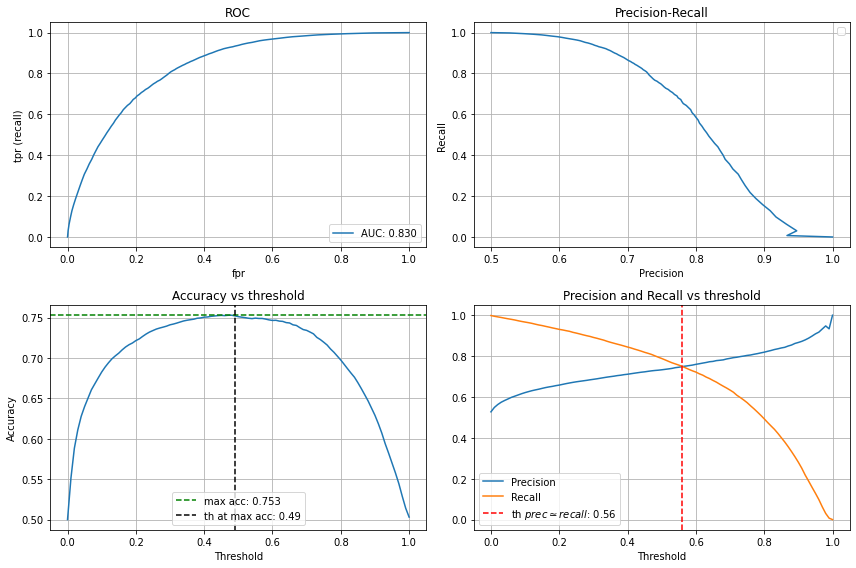

In [13]:
fig, axs = plt.subplots(2,2,figsize=(12,8))

fpr, tpr, th = roc_curve(true, score)
auc = roc_auc_score(true, score)

ax = axs[0,0]
ax.plot(fpr, tpr, label='AUC: %.3f' % auc)
ax.legend(loc='lower right')
ax.grid()
ax.set_xlabel('fpr')
ax.set_ylabel('tpr (recall)')
ax.set_title('ROC')

ax = axs[0,1]
ax.plot(prec, rec)
ax.legend()
ax.grid()
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision-Recall')

ax = axs[1,0]
ax.plot(th[1:], a_s_l)
ax.axhline(m_val, label='max acc: %.3f' % m_val, c='g', ls = '--')
ax.axvline(th_m_val, label='th at max acc: %.2f' % th_m_val, c='k', ls='--')
#ax.axvline(th_min_diff, c='r', ls='--', label=r'th $prec \approx recall$: %.2f' % th_min_diff)
ax.legend()
ax.grid()
ax.set_title('Accuracy vs threshold')
ax.set_xlabel('Threshold')
ax.set_ylabel('Accuracy')

ax = axs[1,1]
ax.plot(th_pr[:], prec[1:], label='Precision')
ax.plot(th_pr[:], rec[1:], label='Recall')
ax.axvline(th_min_diff, c='r', ls='--', label=r'th $prec \simeq recall$: %.2f' % th_min_diff)
#ax.axvline(th_m_val, label='th at max acc: %.2f' % th_m_val, c='k', ls='--')
ax.grid()
ax.legend()
ax.set_xlabel('Threshold')
ax.set_title('Precision and Recall vs threshold')

plt.tight_layout()